依SK_ID_CURR GROUP 以下
- NAME_CONTRACT_STATUS中各狀態佔比
- NAME_TYPE_SUITE中各狀態佔比
- CODE_REJECT_REASON各狀態佔比
- NAME_PAYMENT_TYPE各狀態佔比
- NAME_PRODUCT_TYPE各狀態佔比
- SELLERPLACE_AREA集中程度(在同一家的最大出現次數除以此人的貸款數)
- NFLAG_INSURED_ON_APPROVAL比例
- PRODUCT_COMBINATION各狀態比例
- NAME_SELLER_INDUSTRY各狀態比例
- NAME_YIELD_GROUP各狀態比例

--------------------------------

- ANNUITY/CREDIT最大,最小
- DOWN_PAYMENT/ANNUITY最大,最小
- DOWN_PAYMENT/CREDIT最大,最小
- DOWN_PAYMENT/ANNUITY最大,最小
- GOODS_PRICE/CREDIT最大,最小
- APPLICATION/CREDIT最大,最小
- APPLICATION/GOODS_PRICE最大,最小
- DAYS_LAST_DUE-DAYS_TERMINATION(先把這兩欄的365243改成np.nan)的mean,max

第三筆新增欄位的整理
- RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED的中位數,max,min
- Delay_Rate的max,median
- Delay_Rate/(ANNUITY/CREDIT)的max,median
- SK_DPD_max的max,mean
- SK_DPD_mean的mean
- SK_DPD_mean/(ANNUITY/CREDIT)的mean
- SK_DPD_max/(ANNUITY/CREDIT)的max,mean
- Contract_Change總和佔全部貸款數量的比例(Contract_Change%)
- Contract_Change_count的mean
- CNT_INSTALMENT/Total_Months_rate的mean
- Contract_Change_rate(CNT_INSTALMENT)的mean
- Contract_Change_rate(Total_Months)的mean
- DAYS_ENTRY_DIFF_MAX的MAX,median
- DAYS_ENTRY_DIFF_MEAN的mean
- AMT_PAYMENT_MEDIAN的median
- AMT_PAYMENT_MEDIAN%的median
- AMT_PAYMENT_MAX的MAX,median
- AMT_PAYMENT_MAX%的MAX,median
- AMT_PAYMENT_MEDIAN/ANNUITY的median
- AMT_PAYMENT_MAX/ANNUITY的MAX,median
- AMT_PAYMENT_MEDIAN/CREDIT的median
- AMT_PAYMENT_MAX/CREDIT的MAX,median
- PAYMENT_MAX/MEDIAN的max,min,median
- DELAY%的mean,max
- FINISHED的sum除以總次數(FINISHED%)
- OUTSTANDING的sum(之後除以第一張表的AMT_CREDIT)
- OUTSTANDING的sum(之後除以第一張表的AMT_ANNUITY)
- AMT_PAYMENT_ALL的MEAN(之後除以第一張表的AMT_CREDIT)
- 1_DELAY%的MEAN
- 1_DAYS_ENTRY_DIFF_MAX的MAX,MEAN
- 3_DELAY%的MEAN
- 3_DAYS_ENTRY_DIFF_MAX的MAX,MEAN
- 3_DAYS_ENTRY_DIFF_MEAN的MAX,MEAN
- (其他6,9,-1,-3,-6,-9期的方法一樣)

搭配類別型
- 四種NAME_CONTRACT_TYPE下的第三張表新增欄位整理後(以上新增欄)的狀況
- 依DAYS_LAST_DUE來看最近二年的以上各比例


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
pre = pd.read_csv("..\\..\\datasets\\homecdt_eda\\previous_application.csv")

In [3]:
pre.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [4]:
pre.corr()['AMT_ANNUITY'].apply(lambda x: np.abs(x)).sort_values(ascending=False).head()

AMT_ANNUITY        1.000000
AMT_GOODS_PRICE    0.820895
AMT_CREDIT         0.816429
AMT_APPLICATION    0.808872
CNT_PAYMENT        0.394535
Name: AMT_ANNUITY, dtype: float64

In [5]:
pre.corr()['AMT_DOWN_PAYMENT'].apply(lambda x: np.abs(x)).sort_values(ascending=False).head()

AMT_DOWN_PAYMENT     1.000000
AMT_APPLICATION      0.482776
AMT_GOODS_PRICE      0.482776
RATE_DOWN_PAYMENT    0.473935
AMT_CREDIT           0.301284
Name: AMT_DOWN_PAYMENT, dtype: float64

In [6]:
pre.corr()['AMT_GOODS_PRICE'].apply(lambda x: np.abs(x)).sort_values(ascending=False).head()

AMT_GOODS_PRICE    1.000000
AMT_APPLICATION    0.999884
AMT_CREDIT         0.993087
AMT_ANNUITY        0.820895
CNT_PAYMENT        0.672129
Name: AMT_GOODS_PRICE, dtype: float64

In [7]:
pre.corr()['RATE_DOWN_PAYMENT'].apply(lambda x: np.abs(x)).sort_values(ascending=False).head()

RATE_DOWN_PAYMENT    1.000000
AMT_DOWN_PAYMENT     0.473935
CNT_PAYMENT          0.278875
DAYS_DECISION        0.208742
AMT_CREDIT           0.188128
Name: RATE_DOWN_PAYMENT, dtype: float64

In [11]:
pre.corr()['CNT_PAYMENT'].apply(lambda x: np.abs(x)).sort_values(ascending=False).head()

CNT_PAYMENT        1.000000
AMT_APPLICATION    0.680630
AMT_CREDIT         0.674278
AMT_GOODS_PRICE    0.672129
AMT_ANNUITY        0.394535
Name: CNT_PAYMENT, dtype: float64

In [60]:
pre_w_IP = pd.read_csv("..\\..\\datasets\\homecdt_fteng\\previous_application_w_installment_w_POS.csv",index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3,9,11,16,17,19,20,21,22,23,24,25,26,28,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
pd.set_option('display.max_rows',None)
pre_w_IP.isna().sum()

SK_ID_PREV                                    0
SK_ID_CURR                                    0
NAME_CONTRACT_TYPE                        47622
AMT_ANNUITY                              419857
AMT_APPLICATION                           47622
AMT_CREDIT                                47623
AMT_DOWN_PAYMENT                         943466
AMT_GOODS_PRICE                          433137
WEEKDAY_APPR_PROCESS_START                47622
HOUR_APPR_PROCESS_START                   47622
FLAG_LAST_APPL_PER_CONTRACT               47622
NFLAG_LAST_APPL_IN_DAY                    47622
RATE_DOWN_PAYMENT                        943466
RATE_INTEREST_PRIMARY                   1711885
RATE_INTEREST_PRIVILEGED                1711885
NAME_CASH_LOAN_PURPOSE                    47622
NAME_CONTRACT_STATUS                      47622
DAYS_DECISION                             47622
NAME_PAYMENT_TYPE                         47622
CODE_REJECT_REASON                        47622
NAME_TYPE_SUITE                         

In [6]:
pre_w_IP.shape

(1717836, 96)

In [7]:
pre_w_IP.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,Returned to the store,Approved,Amortized debt,Canceled,XNA,Contract_Change,Contract_Change_count,CNT_INSTALMENT/Total_Months_rate,Contract_Change_rate(CNT_INSTALMENT),Contract_Change_rate(Total_Months)
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,...,0.0,0.0,0.0,0.0,0.0,1.0,11.0,6.0,0.916667,5.500000
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.2,0.000000,0.000000
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2,0.000000,0.000000
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.083333,0.083333
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
pre_w_IP.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       'NUM_INSTALMENT_NUMBER_GROUP_MAX', 'NUM_INSTALMENT_NUMBER_GROUP_MIN',
       'DAYS_ENTRY_PAYMENT_MAX', 'DAYS_ENTR

In [9]:
pd.set_option('display.max_rows',None)
pre_w_IP.isna().sum()/pre_w_IP.shape[0]

SK_ID_PREV                              0.000000
SK_ID_CURR                              0.000000
NAME_CONTRACT_TYPE                      0.027722
AMT_ANNUITY                             0.244410
AMT_APPLICATION                         0.027722
AMT_CREDIT                              0.027723
AMT_DOWN_PAYMENT                        0.549218
AMT_GOODS_PRICE                         0.252141
WEEKDAY_APPR_PROCESS_START              0.027722
HOUR_APPR_PROCESS_START                 0.027722
FLAG_LAST_APPL_PER_CONTRACT             0.027722
NFLAG_LAST_APPL_IN_DAY                  0.027722
RATE_DOWN_PAYMENT                       0.549218
RATE_INTEREST_PRIMARY                   0.996536
RATE_INTEREST_PRIVILEGED                0.996536
NAME_CASH_LOAN_PURPOSE                  0.027722
NAME_CONTRACT_STATUS                    0.027722
DAYS_DECISION                           0.027722
NAME_PAYMENT_TYPE                       0.027722
CODE_REJECT_REASON                      0.027722
NAME_TYPE_SUITE     

In [10]:
for name in pre_w_IP.columns:
    if np.dtype(pre_w_IP[name])=='O' :
        print('\n')
        print(f'{name}欄')
        print(pre_w_IP[name].unique())



NAME_CONTRACT_TYPE欄
['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA' nan]


WEEKDAY_APPR_PROCESS_START欄
['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY'
 nan]


FLAG_LAST_APPL_PER_CONTRACT欄
['Y' 'N' nan]


NAME_CASH_LOAN_PURPOSE欄
['XAP' 'XNA' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Refusal to name the goal'
 'Money for a third person' nan]


NAME_CONTRACT_STATUS欄
['Approved' 'Refused' 'Canceled' 'Unused offer' nan]


NAME_PAYMENT_TYPE欄
['Cash through the bank' 'XNA' 'Non-cash from your account'
 'Cashless from the account of the employer' nan]


CODE_REJECT_REASON欄
['XAP' 'HC' 'LIMIT' 'CLIENT' 'SCOF

In [11]:
for name in pre_w_IP.columns:
    if np.dtype(pre_w_IP[name])!='O' :
        print(name)

SK_ID_PREV
SK_ID_CURR
AMT_ANNUITY
AMT_APPLICATION
AMT_CREDIT
AMT_DOWN_PAYMENT
AMT_GOODS_PRICE
HOUR_APPR_PROCESS_START
NFLAG_LAST_APPL_IN_DAY
RATE_DOWN_PAYMENT
RATE_INTEREST_PRIMARY
RATE_INTEREST_PRIVILEGED
DAYS_DECISION
SELLERPLACE_AREA
CNT_PAYMENT
DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
DAYS_TERMINATION
NFLAG_INSURED_ON_APPROVAL
NUM_INSTALMENT_NUMBER_GROUP_MAX
NUM_INSTALMENT_NUMBER_GROUP_MIN
DAYS_ENTRY_PAYMENT_MAX
DAYS_ENTRY_PAYMENT_MIN
DAYS_ENTRY_DIFF_MAX
DAYS_ENTRY_DIFF_MEAN
AMT_PAYMENT_MEDIAN
AMT_PAYMENT_MAX
DELAY_SUM
DELAY%
AMT_INSTALMENT_ALL
AMT_PAYMENT_ALL
1_DELAY%
1_DAYS_ENTRY_DIFF_MAX
3_DELAY%
3_DAYS_ENTRY_DIFF_MAX
3_DAYS_ENTRY_DIFF_MEAN
6_DELAY%
6_DAYS_ENTRY_DIFF_MAX
6_DAYS_ENTRY_DIFF_MEAN
9_DELAY%
9_DAYS_ENTRY_DIFF_MAX
9_DAYS_ENTRY_DIFF_MEAN
-1_DELAY%
-1_DAYS_ENTRY_DIFF_MAX
-3_DELAY%
-3_DAYS_ENTRY_DIFF_MAX
-3_DAYS_ENTRY_DIFF_MEAN
-6_DELAY%
-6_DAYS_ENTRY_DIFF_MAX
-6_DAYS_ENTRY_DIFF_MEAN
-9_DELAY%
-9_DAYS_ENTRY_DIFF_MAX
-9_DAYS_ENTRY_DIFF_MEAN

In [61]:
pre_w_IP['NAME_CONTRACT_STATUS'].unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer', nan],
      dtype=object)

In [62]:
pre_w_IP['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

#### 新增欄位
- AMT_PAYMENT_MEDIAN%
- AMT_PAYMENT_MAX%
- AMT_PAYMENT_MEDIAN/ANNUITY
- AMT_PAYMENT_MAX/ANNUITY
- AMT_PAYMENT_MEDIAN/CREDIT
- AMT_PAYMENT_MAX/CREDIT
- PAYMENT_MAX/MEDIAN

In [63]:
pre_w_IP['AMT_PAYMENT_MEDIAN%'] = pre_w_IP['AMT_PAYMENT_MEDIAN']/pre_w_IP['AMT_INSTALMENT_ALL']
pre_w_IP['AMT_PAYMENT_MAX%'] = pre_w_IP['AMT_PAYMENT_MAX']/pre_w_IP['AMT_INSTALMENT_ALL']

In [64]:
pre_w_IP['AMT_PAYMENT_MEDIAN/ANNUITY'] = pre_w_IP['AMT_PAYMENT_MEDIAN']/pre_w_IP['AMT_ANNUITY']
pre_w_IP['AMT_PAYMENT_MAX/ANNUITY'] = pre_w_IP['AMT_PAYMENT_MAX']/pre_w_IP['AMT_ANNUITY']

In [65]:
pre_w_IP['AMT_PAYMENT_MEDIAN/CREDIT'] = pre_w_IP['AMT_PAYMENT_MEDIAN']/pre_w_IP['AMT_CREDIT']
pre_w_IP['AMT_PAYMENT_MAX/CREDIT'] = pre_w_IP['AMT_PAYMENT_MAX']/pre_w_IP['AMT_CREDIT']

In [66]:
pre_w_IP['PAYMENT_MAX/MEDIAN'] = pre_w_IP['AMT_PAYMENT_MAX']/pre_w_IP['AMT_PAYMENT_MEDIAN']

#### 非Approved狀態的各項數值可能不具有參考價值，所以另開一張表只使用Approved的貸款

In [67]:
pre_w_IP_A = pre_w_IP[pre_w_IP['NAME_CONTRACT_STATUS']=='Approved'].copy()
pre_w_IP_A.shape

(1036781, 103)

In [68]:
pre_w_IP_A['Annuity/Credit'] = pre_w_IP_A['AMT_ANNUITY']/pre_w_IP_A['AMT_CREDIT']

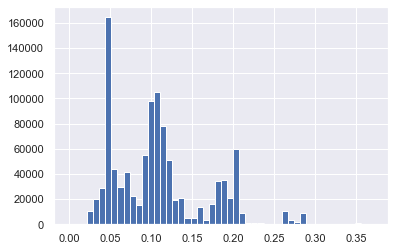

In [35]:
pre_w_IP_A['Annuity/Credit'].hist(bins=50)

In [69]:
pre_w_IP_A['APPLICATION/CREDIT'] = pre_w_IP_A['AMT_APPLICATION']/pre_w_IP_A['AMT_CREDIT']

In [70]:
pre_w_IP_A['DOWN_PAYMENT/ANNUITY'] = pre_w_IP_A['AMT_DOWN_PAYMENT']/pre_w_IP_A['AMT_ANNUITY']
pre_w_IP_A['DOWN_PAYMENT/CREDIT'] = pre_w_IP_A['AMT_DOWN_PAYMENT']/pre_w_IP_A['AMT_CREDIT']
pre_w_IP_A['DOWN_PAYMENT/ANNUITY'] = pre_w_IP_A['AMT_DOWN_PAYMENT']/pre_w_IP_A['AMT_ANNUITY']
pre_w_IP_A['GOODS_PRICE/CREDIT'] = pre_w_IP_A['AMT_GOODS_PRICE']/pre_w_IP_A['AMT_CREDIT']
pre_w_IP_A['APPLICATION/CREDIT'] = pre_w_IP_A['AMT_APPLICATION']/pre_w_IP_A['AMT_CREDIT']
pre_w_IP_A['APPLICATION/GOODS_PRICE'] = pre_w_IP_A['AMT_APPLICATION']/pre_w_IP_A['AMT_GOODS_PRICE']

In [38]:
pre_w_IP_A['FINISHED'].value_counts()

1.0    956047
0.0      2787
Name: FINISHED, dtype: int64

In [39]:
(pre_w_IP_A['SK_ID_CURR'].value_counts()>=2).sum()

249329

In [40]:
(pre_w_IP_A['SK_ID_CURR'].value_counts()==1).sum()

88369

In [41]:
pre_w_IP_A['FLAG_LAST_APPL_PER_CONTRACT'].value_counts()

Y    1036781
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [42]:
pre_w_IP_A['NFLAG_LAST_APPL_IN_DAY'].value_counts()

1.0    1036044
0.0        737
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64

In [71]:
pre_w_IP_A['Delay_Rate/(ANNUITY/CREDIT)'] = pre_w_IP_A['Delay_Rate']/pre_w_IP_A['Annuity/Credit']
pre_w_IP_A['SK_DPD_mean/(ANNUITY/CREDIT)'] = pre_w_IP_A['SK_DPD_mean']/pre_w_IP_A['Annuity/Credit']
pre_w_IP_A['SK_DPD_max/(ANNUITY/CREDIT)'] = pre_w_IP_A['SK_DPD_max']/pre_w_IP_A['Annuity/Credit']

### 整理的資料放在pre_w_IP_A2

In [72]:
pre_w_IP_A2 = pd.DataFrame(pre_w_IP_A.groupby('SK_ID_CURR').agg({'RATE_INTEREST_PRIMARY':['median','max','min'],
                                      'RATE_INTEREST_PRIVILEGED':['median','max','min'],
                                      'Delay_Rate':['max','median'],
                                      'Delay_Rate/(ANNUITY/CREDIT)':['max','median'],
                                      'SK_DPD_max':['max','mean'],
                                      'SK_DPD_mean':'mean',
                                      'SK_DPD_mean/(ANNUITY/CREDIT)':'mean',
                                      'SK_DPD_max/(ANNUITY/CREDIT)':['mean','max'],
                                      'Contract_Change':['sum','count'],
                                      'Contract_Change_count':'mean',
                                      'CNT_INSTALMENT/Total_Months_rate':'mean',
                                      'Contract_Change_rate(CNT_INSTALMENT)':'mean',
                                      'Contract_Change_rate(Total_Months)':'mean',
                                      'DAYS_ENTRY_DIFF_MAX':['max','median'],
                                      'DAYS_ENTRY_DIFF_MEAN':'mean',
                                      'AMT_PAYMENT_MEDIAN':'median',
                                      'AMT_PAYMENT_MEDIAN%':'median',
                                      'AMT_PAYMENT_MAX':['median','max'],
                                      'AMT_PAYMENT_MAX%':['median','max'],
                                      'AMT_PAYMENT_MEDIAN/ANNUITY':'median',
                                      'AMT_PAYMENT_MAX/ANNUITY':['median','max'],
                                      'AMT_PAYMENT_MEDIAN/CREDIT':'median',
                                      'AMT_PAYMENT_MAX/CREDIT':['median','max'],
                                      'PAYMENT_MAX/MEDIAN':['max','min','median'],
                                      'DELAY%':['mean','max'],
                                      'FINISHED':['sum','count'],
                                      'OUTSTANDING':'sum',
                                      'AMT_PAYMENT_ALL':'mean',
                                      '1_DELAY%':'mean',
                                      '1_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '3_DELAY%':'mean',
                                      '3_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '3_DAYS_ENTRY_DIFF_MEAN':['mean','max'],
                                      '6_DELAY%':'mean',
                                      '6_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '6_DAYS_ENTRY_DIFF_MEAN':['mean','max'],
                                      '9_DELAY%':'mean',
                                      '9_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '9_DAYS_ENTRY_DIFF_MEAN':['mean','max'],
                                      '-1_DELAY%':'mean',
                                      '-1_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '-3_DELAY%':'mean',
                                      '-3_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '-3_DAYS_ENTRY_DIFF_MEAN':['mean','max'],
                                      '-6_DELAY%':'mean',
                                      '-6_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '-6_DAYS_ENTRY_DIFF_MEAN':['mean','max'],
                                      '-9_DELAY%':'mean',
                                      '-9_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '-9_DAYS_ENTRY_DIFF_MEAN':['mean','max']}))
pre_w_IP_A2.columns

MultiIndex([(               'RATE_INTEREST_PRIMARY', 'median'),
            (               'RATE_INTEREST_PRIMARY',    'max'),
            (               'RATE_INTEREST_PRIMARY',    'min'),
            (            'RATE_INTEREST_PRIVILEGED', 'median'),
            (            'RATE_INTEREST_PRIVILEGED',    'max'),
            (            'RATE_INTEREST_PRIVILEGED',    'min'),
            (                          'Delay_Rate',    'max'),
            (                          'Delay_Rate', 'median'),
            (         'Delay_Rate/(ANNUITY/CREDIT)',    'max'),
            (         'Delay_Rate/(ANNUITY/CREDIT)', 'median'),
            (                          'SK_DPD_max',    'max'),
            (                          'SK_DPD_max',   'mean'),
            (                         'SK_DPD_mean',   'mean'),
            (        'SK_DPD_mean/(ANNUITY/CREDIT)',   'mean'),
            (         'SK_DPD_max/(ANNUITY/CREDIT)',   'mean'),
            (         'SK_DPD_max/(ANNUI

In [73]:
pre_w_IP_A2.head()

RATE_INTEREST_PRIMARY         RATE_INTEREST_PRIVILEGED          \
                          median max min                   median max min   
SK_ID_CURR                                                                  
100001                       NaN NaN NaN                      NaN NaN NaN   
100002                       NaN NaN NaN                      NaN NaN NaN   
100003                       NaN NaN NaN                      NaN NaN NaN   
100004                       NaN NaN NaN                      NaN NaN NaN   
100005                       NaN NaN NaN                      NaN NaN NaN   

           Delay_Rate        Delay_Rate/(ANNUITY/CREDIT)         ...  \
                  max median                         max median  ...   
SK_ID_CURR                                                       ...   
100001            0.0    0.0                         0.0    0.0  ...   
100002            0.0    0.0                         0.0    0.0  ...   
100003            0.0    0.0                         0.0    0.0  ...   
100004            0.0    0.0                         0.0    0.0  ...   
100005            0.0    0.0                         0.0    0.0  ...   

           -6_DELAY% -6_DAYS_ENTRY_DIFF_MAX       -6_DAYS_ENTRY_DIFF_MEAN  \
                mean                   mean   max                    mean   
SK_ID_CURR                                                                  
100001      0.000000              -6.000000  -6.0              -15.500000   
100002      0.000000             -12.000000 -12.0              -17.000000   
100003      0.000000              -4.333333  -1.0               -6.611111   
100004      0.000000              -3.000000  -3.0               -7.666667   
100005      0.166667               1.000000   1.0              -18.333333   

                      -9_DELAY% -9_DAYS_ENTRY_DIFF_MAX        \
                  max      mean                   mean   max   
SK_ID_CURR                                                     
100001     -15.500000  0.000000              -6.000000  -6.0   
100002     -17.000000  0.000000             -12.000000 -12.0   
100003      -4.000000  0.000000              -4.333333  -1.0   
100004      -7.666667  0.000000              -3.000000  -3.0   
100005     -18.333333  0.111111               1.000000   1.0   

           -9_DAYS_ENTRY_DIFF_MEAN             
                              mean        max  
SK_ID_CURR                                     
100001                  -15.500000 -15.500000  
100002                  -17.222222 -17.222222  
100003                   -6.939153  -4.428571  
100004                   -7.666667  -7.666667  
100005                  -23.555556 -23.555556  

[5 rows x 82 columns]

In [74]:
pre_w_IP_A2.columns=['RATE_INTEREST_PRIMARY_median',
                     'RATE_INTEREST_PRIMARY_max',
                    'RATE_INTEREST_PRIMARY_min',
                    'RATE_INTEREST_PRIVILEGED_median',
                    'RATE_INTEREST_PRIVILEGED_max',
                    'RATE_INTEREST_PRIVILEGED_min',
                    'Delay_Rate_max',
                    'Delay_Rate_median',
                    'Delay_Rate/(ANNUITY/CREDIT)_max',
                    'Delay_Rate/(ANNUITY/CREDIT)_median',
                    'SK_DPD_max_max',
                    'SK_DPD_max_mean',
                    'SK_DPD_mean_mean',
                    'SK_DPD_mean/(ANNUITY/CREDIT)_mean',
                    'SK_DPD_max/(ANNUITY/CREDIT)_max',
                    'SK_DPD_max/(ANNUITY/CREDIT)_mean',
                    'Contract_Change_sum',
                    'Contract_Change_count',
                    'Contract_Change_Count_mean',
                    'CNT_INSTALMENT/Total_Months_rate_mean',
                    'Contract_Change_rate(CNT_INSTALMENT)_mean',
                    'Contract_Change_rate(Total_Months)_mean',
                    'DAYS_ENTRY_DIFF_MAX_max',
                    'DAYS_ENTRY_DIFF_MAX_median',
                    'DAYS_ENTRY_DIFF_MEAN_mean',
                    'AMT_PAYMENT_MEDIAN_median',
                    'AMT_PAYMENT_MEDIAN%_median',
                    'AMT_PAYMENT_MAX_median',
                    'AMT_PAYMENT_MAX_max',
                    'AMT_PAYMENT_MAX%_median',
                    'AMT_PAYMENT_MAX%_max',
                    'AMT_PAYMENT_MEDIAN/ANNUITY_median',
                    'AMT_PAYMENT_MAX/ANNUITY_median',
                    'AMT_PAYMENT_MAX/ANNUITY_max',
                    'AMT_PAYMENT_MEDIAN/CREDIT_median',
                    'AMT_PAYMENT_MAX/CREDIT_median',
                    'AMT_PAYMENT_MAX/CREDIT_max',
                    'PAYMENT_MAX/MEDIAN_max',
                    'PAYMENT_MAX/MEDIAN_min',
                    'PAYMENT_MAX/MEDIAN_median',
                    'DELAY%_mean',
                    'DELAY%_max',
                    'FINISHED_sum',
                    'FINISHED_count',
                    'OUTSTANDING_sum',
                    'AMT_PAYMENT_ALL_mean',
                    '1_DELAY%_mean',
                    '1_DAYS_ENTRY_DIFF_MAX_mean',
                    '1_DAYS_ENTRY_DIFF_MAX_max',
                    '3_DELAY%_mean',
                    '3_DAYS_ENTRY_DIFF_MAX_mean',
                    '3_DAYS_ENTRY_DIFF_MAX_max',
                    '3_DAYS_ENTRY_DIFF_MEAN_mean',
                    '3_DAYS_ENTRY_DIFF_MEAN_max',
                    '6_DELAY%_mean',
                    '6_DAYS_ENTRY_DIFF_MAX_mean',
                    '6_DAYS_ENTRY_DIFF_MAX_max',
                    '6_DAYS_ENTRY_DIFF_MEAN_mean',
                    '6_DAYS_ENTRY_DIFF_MEAN_max',
                    '9_DELAY%_mean',
                    '9_DAYS_ENTRY_DIFF_MAX_mean',
                    '9_DAYS_ENTRY_DIFF_MAX_max',
                    '9_DAYS_ENTRY_DIFF_MEAN_mean',
                    '9_DAYS_ENTRY_DIFF_MEAN_max',
                    '-1_DELAY%_mean',
                    '-1_DAYS_ENTRY_DIFF_MAX_mean',
                    '-1_DAYS_ENTRY_DIFF_MAX_max',
                    '-3_DELAY%_mean',
                    '-3_DAYS_ENTRY_DIFF_MAX_mean',
                    '-3_DAYS_ENTRY_DIFF_MAX_max',
                    '-3_DAYS_ENTRY_DIFF_MEAN_mean',
                    '-3_DAYS_ENTRY_DIFF_MEAN_max',
                    '-6_DELAY%_mean',
                    '-6_DAYS_ENTRY_DIFF_MAX_mean',
                    '-6_DAYS_ENTRY_DIFF_MAX_max',
                    '-6_DAYS_ENTRY_DIFF_MEAN_mean',
                    '-6_DAYS_ENTRY_DIFF_MEAN_max',
                    '-9_DELAY%_mean',
                    '-9_DAYS_ENTRY_DIFF_MAX_mean',
                    '-9_DAYS_ENTRY_DIFF_MAX_max',
                    '-9_DAYS_ENTRY_DIFF_MEAN_mean',
                    '-9_DAYS_ENTRY_DIFF_MEAN_max']
pre_w_IP_A2.columns

Index(['RATE_INTEREST_PRIMARY_median', 'RATE_INTEREST_PRIMARY_max',
       'RATE_INTEREST_PRIMARY_min', 'RATE_INTEREST_PRIVILEGED_median',
       'RATE_INTEREST_PRIVILEGED_max', 'RATE_INTEREST_PRIVILEGED_min',
       'Delay_Rate_max', 'Delay_Rate_median',
       'Delay_Rate/(ANNUITY/CREDIT)_max', 'Delay_Rate/(ANNUITY/CREDIT)_median',
       'SK_DPD_max_max', 'SK_DPD_max_mean', 'SK_DPD_mean_mean',
       'SK_DPD_mean/(ANNUITY/CREDIT)_mean', 'SK_DPD_max/(ANNUITY/CREDIT)_max',
       'SK_DPD_max/(ANNUITY/CREDIT)_mean', 'Contract_Change_sum',
       'Contract_Change_count', 'Contract_Change_Count_mean',
       'CNT_INSTALMENT/Total_Months_rate_mean',
       'Contract_Change_rate(CNT_INSTALMENT)_mean',
       'Contract_Change_rate(Total_Months)_mean', 'DAYS_ENTRY_DIFF_MAX_max',
       'DAYS_ENTRY_DIFF_MAX_median', 'DAYS_ENTRY_DIFF_MEAN_mean',
       'AMT_PAYMENT_MEDIAN_median', 'AMT_PAYMENT_MEDIAN%_median',
       'AMT_PAYMENT_MAX_median', 'AMT_PAYMENT_MAX_max',
       'AMT_PAYMENT_MAX%_med

In [75]:
pre_w_IP_A2['Contract_Change%'] = pre_w_IP_A2['Contract_Change_sum']/pre_w_IP_A2['Contract_Change_count']
pre_w_IP_A2.drop(columns=['Contract_Change_sum','Contract_Change_count'],inplace=True)
pre_w_IP_A2.columns

Index(['RATE_INTEREST_PRIMARY_median', 'RATE_INTEREST_PRIMARY_max',
       'RATE_INTEREST_PRIMARY_min', 'RATE_INTEREST_PRIVILEGED_median',
       'RATE_INTEREST_PRIVILEGED_max', 'RATE_INTEREST_PRIVILEGED_min',
       'Delay_Rate_max', 'Delay_Rate_median',
       'Delay_Rate/(ANNUITY/CREDIT)_max', 'Delay_Rate/(ANNUITY/CREDIT)_median',
       'SK_DPD_max_max', 'SK_DPD_max_mean', 'SK_DPD_mean_mean',
       'SK_DPD_mean/(ANNUITY/CREDIT)_mean', 'SK_DPD_max/(ANNUITY/CREDIT)_max',
       'SK_DPD_max/(ANNUITY/CREDIT)_mean', 'Contract_Change_Count_mean',
       'CNT_INSTALMENT/Total_Months_rate_mean',
       'Contract_Change_rate(CNT_INSTALMENT)_mean',
       'Contract_Change_rate(Total_Months)_mean', 'DAYS_ENTRY_DIFF_MAX_max',
       'DAYS_ENTRY_DIFF_MAX_median', 'DAYS_ENTRY_DIFF_MEAN_mean',
       'AMT_PAYMENT_MEDIAN_median', 'AMT_PAYMENT_MEDIAN%_median',
       'AMT_PAYMENT_MAX_median', 'AMT_PAYMENT_MAX_max',
       'AMT_PAYMENT_MAX%_median', 'AMT_PAYMENT_MAX%_max',
       'AMT_PAYMENT_MEDIA

In [76]:
pre_w_IP_A2['FINISHED%'] = pre_w_IP_A2['FINISHED_sum']/pre_w_IP_A2['FINISHED_count']
pre_w_IP_A2.drop(columns=['FINISHED_sum','FINISHED_count'],inplace=True)

In [85]:
pre_w_IP_A2.reset_index(level='SK_ID_CURR',inplace=True)

In [105]:
pre_w_IP_A2.to_csv('..\\..\\datasets\\homecdt_fteng\\previous_application_FE_w_installment&POS.csv',index = False)

### 整理出兩年內的資料與各數值 pre_w_IP_A3

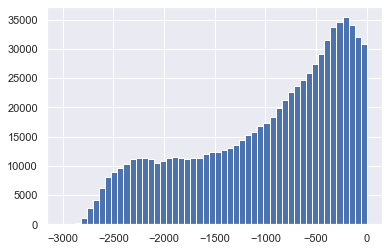

In [79]:
pre_w_IP_A['DAYS_LAST_DUE'].hist(bins=50,range=(-3000,0))

In [81]:
pre_w_IP_A3 = pre_w_IP_A[(pre_w_IP_A['DAYS_LAST_DUE']>=-730)&(pre_w_IP_A['DAYS_LAST_DUE']<=0)].copy()

In [82]:
pre_w_IP_A3.shape

(366870, 112)

In [83]:
pre_w_IP_A3 = pd.DataFrame(pre_w_IP_A3.groupby('SK_ID_CURR').agg({'RATE_INTEREST_PRIMARY':['median','max','min'],
                                      'RATE_INTEREST_PRIVILEGED':['median','max','min'],
                                      'Delay_Rate':['max','median'],
                                      'Delay_Rate/(ANNUITY/CREDIT)':['max','median'],
                                      'SK_DPD_max':['max','mean'],
                                      'SK_DPD_mean':'mean',
                                      'SK_DPD_mean/(ANNUITY/CREDIT)':'mean',
                                      'SK_DPD_max/(ANNUITY/CREDIT)':['mean','max'],
                                      'Contract_Change':['sum','count'],
                                      'Contract_Change_count':'mean',
                                      'CNT_INSTALMENT/Total_Months_rate':'mean',
                                      'Contract_Change_rate(CNT_INSTALMENT)':'mean',
                                      'Contract_Change_rate(Total_Months)':'mean',
                                      'DAYS_ENTRY_DIFF_MAX':['max','median'],
                                      'DAYS_ENTRY_DIFF_MEAN':'mean',
                                      'AMT_PAYMENT_MEDIAN':'median',
                                      'AMT_PAYMENT_MEDIAN%':'median',
                                      'AMT_PAYMENT_MAX':['median','max'],
                                      'AMT_PAYMENT_MAX%':['median','max'],
                                      'AMT_PAYMENT_MEDIAN/ANNUITY':'median',
                                      'AMT_PAYMENT_MAX/ANNUITY':['median','max'],
                                      'AMT_PAYMENT_MEDIAN/CREDIT':'median',
                                      'AMT_PAYMENT_MAX/CREDIT':['median','max'],
                                      'PAYMENT_MAX/MEDIAN':['max','min','median'],
                                      'DELAY%':['mean','max'],
                                      'FINISHED':['sum','count'],
                                      'OUTSTANDING':'sum',
                                      'AMT_PAYMENT_ALL':'mean',
                                      '1_DELAY%':'mean',
                                      '1_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '3_DELAY%':'mean',
                                      '3_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '3_DAYS_ENTRY_DIFF_MEAN':['mean','max'],
                                      '6_DELAY%':'mean',
                                      '6_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '6_DAYS_ENTRY_DIFF_MEAN':['mean','max'],
                                      '9_DELAY%':'mean',
                                      '9_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '9_DAYS_ENTRY_DIFF_MEAN':['mean','max'],
                                      '-1_DELAY%':'mean',
                                      '-1_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '-3_DELAY%':'mean',
                                      '-3_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '-3_DAYS_ENTRY_DIFF_MEAN':['mean','max'],
                                      '-6_DELAY%':'mean',
                                      '-6_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '-6_DAYS_ENTRY_DIFF_MEAN':['mean','max'],
                                      '-9_DELAY%':'mean',
                                      '-9_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '-9_DAYS_ENTRY_DIFF_MEAN':['mean','max']}))

In [92]:
pre_w_IP_A3.columns=['RATE_INTEREST_PRIMARY_median_in2y',
                     'RATE_INTEREST_PRIMARY_max_in2y',
                    'RATE_INTEREST_PRIMARY_min_in2y',
                    'RATE_INTEREST_PRIVILEGED_median_in2y',
                    'RATE_INTEREST_PRIVILEGED_max_in2y',
                    'RATE_INTEREST_PRIVILEGED_min_in2y',
                    'Delay_Rate_max_in2y',
                    'Delay_Rate_median_in2y',
                    'Delay_Rate/(ANNUITY/CREDIT)_max_in2y',
                    'Delay_Rate/(ANNUITY/CREDIT)_median_in2y',
                    'SK_DPD_max_max_in2y',
                    'SK_DPD_max_mean_in2y',
                    'SK_DPD_mean_mean_in2y',
                    'SK_DPD_mean/(ANNUITY/CREDIT)_mean_in2y',
                    'SK_DPD_max/(ANNUITY/CREDIT)_max_in2y',
                    'SK_DPD_max/(ANNUITY/CREDIT)_mean_in2y',
                    'Contract_Change_sum_in2y',
                    'Contract_Change_count_in2y',
                    'Contract_Change_Count_mean_in2y',
                    'CNT_INSTALMENT/Total_Months_rate_mean_in2y',
                    'Contract_Change_rate(CNT_INSTALMENT)_mean_in2y',
                    'Contract_Change_rate(Total_Months)_mean_in2y',
                    'DAYS_ENTRY_DIFF_MAX_max_in2y',
                    'DAYS_ENTRY_DIFF_MAX_median_in2y',
                    'DAYS_ENTRY_DIFF_MEAN_mean_in2y',
                    'AMT_PAYMENT_MEDIAN_median_in2y',
                    'AMT_PAYMENT_MEDIAN%_median_in2y',
                    'AMT_PAYMENT_MAX_median_in2y',
                    'AMT_PAYMENT_MAX_max_in2y',
                    'AMT_PAYMENT_MAX%_median_in2y',
                    'AMT_PAYMENT_MAX%_max_in2y',
                    'AMT_PAYMENT_MEDIAN/ANNUITY_median_in2y',
                    'AMT_PAYMENT_MAX/ANNUITY_median_in2y',
                    'AMT_PAYMENT_MAX/ANNUITY_max_in2y',
                    'AMT_PAYMENT_MEDIAN/CREDIT_median_in2y',
                    'AMT_PAYMENT_MAX/CREDIT_median_in2y',
                    'AMT_PAYMENT_MAX/CREDIT_max_in2y',
                    'PAYMENT_MAX/MEDIAN_max_in2y',
                    'PAYMENT_MAX/MEDIAN_min_in2y',
                    'PAYMENT_MAX/MEDIAN_median_in2y',
                    'DELAY%_mean_in2y',
                    'DELAY%_max_in2y',
                    'FINISHED_sum_in2y',
                    'FINISHED_count_in2y',
                    'OUTSTANDING_sum_in2y',
                    'AMT_PAYMENT_ALL_mean_in2y',
                    '1_DELAY%_mean_in2y',
                    '1_DAYS_ENTRY_DIFF_MAX_mean_in2y',
                    '1_DAYS_ENTRY_DIFF_MAX_max_in2y',
                    '3_DELAY%_mean_in2y',
                    '3_DAYS_ENTRY_DIFF_MAX_mean_in2y',
                    '3_DAYS_ENTRY_DIFF_MAX_max_in2y',
                    '3_DAYS_ENTRY_DIFF_MEAN_mean_in2y',
                    '3_DAYS_ENTRY_DIFF_MEAN_max_in2y',
                    '6_DELAY%_mean_in2y',
                    '6_DAYS_ENTRY_DIFF_MAX_mean_in2y',
                    '6_DAYS_ENTRY_DIFF_MAX_max_in2y',
                    '6_DAYS_ENTRY_DIFF_MEAN_mean_in2y',
                    '6_DAYS_ENTRY_DIFF_MEAN_max_in2y',
                    '9_DELAY%_mean_in2y',
                    '9_DAYS_ENTRY_DIFF_MAX_mean_in2y',
                    '9_DAYS_ENTRY_DIFF_MAX_max_in2y',
                    '9_DAYS_ENTRY_DIFF_MEAN_mean_in2y',
                    '9_DAYS_ENTRY_DIFF_MEAN_max_in2y',
                    '-1_DELAY%_mean_in2y',
                    '-1_DAYS_ENTRY_DIFF_MAX_mean_in2y',
                    '-1_DAYS_ENTRY_DIFF_MAX_max_in2y',
                    '-3_DELAY%_mean_in2y',
                    '-3_DAYS_ENTRY_DIFF_MAX_mean_in2y',
                    '-3_DAYS_ENTRY_DIFF_MAX_max_in2y',
                    '-3_DAYS_ENTRY_DIFF_MEAN_mean_in2y',
                    '-3_DAYS_ENTRY_DIFF_MEAN_max_in2y',
                    '-6_DELAY%_mean_in2y',
                    '-6_DAYS_ENTRY_DIFF_MAX_mean_in2y',
                    '-6_DAYS_ENTRY_DIFF_MAX_max_in2y',
                    '-6_DAYS_ENTRY_DIFF_MEAN_mean_in2y',
                    '-6_DAYS_ENTRY_DIFF_MEAN_max_in2y',
                    '-9_DELAY%_mean_in2y',
                    '-9_DAYS_ENTRY_DIFF_MAX_mean_in2y',
                    '-9_DAYS_ENTRY_DIFF_MAX_max_in2y',
                    '-9_DAYS_ENTRY_DIFF_MEAN_mean_in2y',
                    '-9_DAYS_ENTRY_DIFF_MEAN_max_in2y']
pre_w_IP_A3['Contract_Change%_in2y'] = pre_w_IP_A3['Contract_Change_sum_in2y']/pre_w_IP_A3['Contract_Change_count_in2y']
pre_w_IP_A3.drop(columns=['Contract_Change_sum_in2y','Contract_Change_count_in2y'],inplace=True)
pre_w_IP_A3['FINISHED%_in2y'] = pre_w_IP_A3['FINISHED_sum_in2y']/pre_w_IP_A3['FINISHED_count_in2y']
pre_w_IP_A3.drop(columns=['FINISHED_sum_in2y','FINISHED_count_in2y'],inplace=True)
pre_w_IP_A3.reset_index(level='SK_ID_CURR',inplace=True)
pre_w_IP_A3.head()

,SK_ID_CURR,RATE_INTEREST_PRIMARY_median_in2y,RATE_INTEREST_PRIMARY_max_in2y,RATE_INTEREST_PRIMARY_min_in2y,RATE_INTEREST_PRIVILEGED_median_in2y,RATE_INTEREST_PRIVILEGED_max_in2y,RATE_INTEREST_PRIVILEGED_min_in2y,Delay_Rate_max_in2y,Delay_Rate_median_in2y,Delay_Rate/(ANNUITY/CREDIT)_max_in2y,...,-6_DAYS_ENTRY_DIFF_MAX_max_in2y,-6_DAYS_ENTRY_DIFF_MEAN_mean_in2y,-6_DAYS_ENTRY_DIFF_MEAN_max_in2y,-9_DELAY%_mean_in2y,-9_DAYS_ENTRY_DIFF_MAX_mean_in2y,-9_DAYS_ENTRY_DIFF_MAX_max_in2y,-9_DAYS_ENTRY_DIFF_MEAN_mean_in2y,-9_DAYS_ENTRY_DIFF_MEAN_max_in2y,Contract_Change%_in2y,FINISHED%_in2y
0,100002,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,-12.0,-17.000000,-17.000000,0.000000,-12.0,-12.0,-17.222222,-17.222222,0.0,1.0
1,100003,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,-3.0,-7.916667,-4.666667,0.000000,-6.0,-3.0,-7.797619,-4.428571,0.5,1.0
2,100004,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,-3.0,-7.666667,-7.666667,0.000000,-3.0,-3.0,-7.666667,-7.666667,0.0,1.0
3,100005,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1.0,-18.333333,-18.333333,0.111111,1.0,1.0,-23.555556,-23.555556,1.0,1.0
4,100006,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,-13.0,-35.700000,-23.000000,0.000000,-18.0,-13.0,-35.700000,-23.000000,1.0,1.0


In [106]:
pre_w_IP_A3.to_csv('..\\..\\datasets\\homecdt_fteng\\previous_application_FE_w_installment&POS_in2y.csv',index = False)

In [93]:
test = pd.read_csv("..\\..\\datasets\\homecdt_eda\\application_test.csv")

In [94]:
test['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [95]:
train = pd.read_csv("..\\..\\datasets\\homecdt_eda\\application_train.csv")

In [96]:
train['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [97]:
pre_w_IP['NAME_CONTRACT_TYPE'].unique()

array(['Consumer loans', 'Cash loans', 'Revolving loans', 'XNA', nan],
      dtype=object)

### 將整理的數值資料分成Cash loans的 (pre_w_IP_A5)與Revolving loans的 (pre_w_IP_A6)

In [98]:
pre_w_IP_A5 = pre_w_IP_A[pre_w_IP_A['NAME_CONTRACT_TYPE']=='Cash loans']

In [99]:
pre_w_IP_A5 = pd.DataFrame(pre_w_IP_A5.groupby('SK_ID_CURR').agg({'RATE_INTEREST_PRIMARY':['median','max','min'],
                                      'RATE_INTEREST_PRIVILEGED':['median','max','min'],
                                      'Delay_Rate':['max','median'],
                                      'Delay_Rate/(ANNUITY/CREDIT)':['max','median'],
                                      'SK_DPD_max':['max','mean'],
                                      'SK_DPD_mean':'mean',
                                      'SK_DPD_mean/(ANNUITY/CREDIT)':'mean',
                                      'SK_DPD_max/(ANNUITY/CREDIT)':['mean','max'],
                                      'Contract_Change':['sum','count'],
                                      'Contract_Change_count':'mean',
                                      'CNT_INSTALMENT/Total_Months_rate':'mean',
                                      'Contract_Change_rate(CNT_INSTALMENT)':'mean',
                                      'Contract_Change_rate(Total_Months)':'mean',
                                      'DAYS_ENTRY_DIFF_MAX':['max','median'],
                                      'DAYS_ENTRY_DIFF_MEAN':'mean',
                                      'AMT_PAYMENT_MEDIAN':'median',
                                      'AMT_PAYMENT_MEDIAN%':'median',
                                      'AMT_PAYMENT_MAX':['median','max'],
                                      'AMT_PAYMENT_MAX%':['median','max'],
                                      'AMT_PAYMENT_MEDIAN/ANNUITY':'median',
                                      'AMT_PAYMENT_MAX/ANNUITY':['median','max'],
                                      'AMT_PAYMENT_MEDIAN/CREDIT':'median',
                                      'AMT_PAYMENT_MAX/CREDIT':['median','max'],
                                      'PAYMENT_MAX/MEDIAN':['max','min','median'],
                                      'DELAY%':['mean','max'],
                                      'FINISHED':['sum','count'],
                                      'OUTSTANDING':'sum',
                                      'AMT_PAYMENT_ALL':'mean',
                                      '1_DELAY%':'mean',
                                      '1_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '3_DELAY%':'mean',
                                      '3_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '3_DAYS_ENTRY_DIFF_MEAN':['mean','max'],
                                      '6_DELAY%':'mean',
                                      '6_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '6_DAYS_ENTRY_DIFF_MEAN':['mean','max'],
                                      '9_DELAY%':'mean',
                                      '9_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '9_DAYS_ENTRY_DIFF_MEAN':['mean','max'],
                                      '-1_DELAY%':'mean',
                                      '-1_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '-3_DELAY%':'mean',
                                      '-3_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '-3_DAYS_ENTRY_DIFF_MEAN':['mean','max'],
                                      '-6_DELAY%':'mean',
                                      '-6_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '-6_DAYS_ENTRY_DIFF_MEAN':['mean','max'],
                                      '-9_DELAY%':'mean',
                                      '-9_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '-9_DAYS_ENTRY_DIFF_MEAN':['mean','max']}))

In [101]:
pre_w_IP_A5.columns=['RATE_INTEREST_PRIMARY_median_CL',
                     'RATE_INTEREST_PRIMARY_max_CL',
                    'RATE_INTEREST_PRIMARY_min_CL',
                    'RATE_INTEREST_PRIVILEGED_median_CL',
                    'RATE_INTEREST_PRIVILEGED_max_CL',
                    'RATE_INTEREST_PRIVILEGED_min_CL',
                    'Delay_Rate_max_CL',
                    'Delay_Rate_median_CL',
                    'Delay_Rate/(ANNUITY/CREDIT)_max_CL',
                    'Delay_Rate/(ANNUITY/CREDIT)_median_CL',
                    'SK_DPD_max_max_CL',
                    'SK_DPD_max_mean_CL',
                    'SK_DPD_mean_mean_CL',
                    'SK_DPD_mean/(ANNUITY/CREDIT)_mean_CL',
                    'SK_DPD_max/(ANNUITY/CREDIT)_max_CL',
                    'SK_DPD_max/(ANNUITY/CREDIT)_mean_CL',
                    'Contract_Change_sum_CL',
                    'Contract_Change_count_CL',
                    'Contract_Change_Count_mean_CL',
                    'CNT_INSTALMENT/Total_Months_rate_mean_CL',
                    'Contract_Change_rate(CNT_INSTALMENT)_mean_CL',
                    'Contract_Change_rate(Total_Months)_mean_CL',
                    'DAYS_ENTRY_DIFF_MAX_max_CL',
                    'DAYS_ENTRY_DIFF_MAX_median_CL',
                    'DAYS_ENTRY_DIFF_MEAN_mean_CL',
                    'AMT_PAYMENT_MEDIAN_median_CL',
                    'AMT_PAYMENT_MEDIAN%_median_CL',
                    'AMT_PAYMENT_MAX_median_CL',
                    'AMT_PAYMENT_MAX_max_CL',
                    'AMT_PAYMENT_MAX%_median_CL',
                    'AMT_PAYMENT_MAX%_max_CL',
                    'AMT_PAYMENT_MEDIAN/ANNUITY_median_CL',
                    'AMT_PAYMENT_MAX/ANNUITY_median_CL',
                    'AMT_PAYMENT_MAX/ANNUITY_max_CL',
                    'AMT_PAYMENT_MEDIAN/CREDIT_median_CL',
                    'AMT_PAYMENT_MAX/CREDIT_median_CL',
                    'AMT_PAYMENT_MAX/CREDIT_max_CL',
                    'PAYMENT_MAX/MEDIAN_max_CL',
                    'PAYMENT_MAX/MEDIAN_min_CL',
                    'PAYMENT_MAX/MEDIAN_median_CL',
                    'DELAY%_mean_CL',
                    'DELAY%_max_CL',
                    'FINISHED_sum_CL',
                    'FINISHED_count_CL',
                    'OUTSTANDING_sum_CL',
                    'AMT_PAYMENT_ALL_mean_CL',
                    '1_DELAY%_mean_CL',
                    '1_DAYS_ENTRY_DIFF_MAX_mean_CL',
                    '1_DAYS_ENTRY_DIFF_MAX_max_CL',
                    '3_DELAY%_mean_CL',
                    '3_DAYS_ENTRY_DIFF_MAX_mean_CL',
                    '3_DAYS_ENTRY_DIFF_MAX_max_CL',
                    '3_DAYS_ENTRY_DIFF_MEAN_mean_CL',
                    '3_DAYS_ENTRY_DIFF_MEAN_max_CL',
                    '6_DELAY%_mean_CL',
                    '6_DAYS_ENTRY_DIFF_MAX_mean_CL',
                    '6_DAYS_ENTRY_DIFF_MAX_max_CL',
                    '6_DAYS_ENTRY_DIFF_MEAN_mean_CL',
                    '6_DAYS_ENTRY_DIFF_MEAN_max_CL',
                    '9_DELAY%_mean_CL',
                    '9_DAYS_ENTRY_DIFF_MAX_mean_CL',
                    '9_DAYS_ENTRY_DIFF_MAX_max_CL',
                    '9_DAYS_ENTRY_DIFF_MEAN_mean_CL',
                    '9_DAYS_ENTRY_DIFF_MEAN_max_CL',
                    '-1_DELAY%_mean_CL',
                    '-1_DAYS_ENTRY_DIFF_MAX_mean_CL',
                    '-1_DAYS_ENTRY_DIFF_MAX_max_CL',
                    '-3_DELAY%_mean_CL',
                    '-3_DAYS_ENTRY_DIFF_MAX_mean_CL',
                    '-3_DAYS_ENTRY_DIFF_MAX_max_CL',
                    '-3_DAYS_ENTRY_DIFF_MEAN_mean_CL',
                    '-3_DAYS_ENTRY_DIFF_MEAN_max_CL',
                    '-6_DELAY%_mean_CL',
                    '-6_DAYS_ENTRY_DIFF_MAX_mean_CL',
                    '-6_DAYS_ENTRY_DIFF_MAX_max_CL',
                    '-6_DAYS_ENTRY_DIFF_MEAN_mean_CL',
                    '-6_DAYS_ENTRY_DIFF_MEAN_max_CL',
                    '-9_DELAY%_mean_CL',
                    '-9_DAYS_ENTRY_DIFF_MAX_mean_CL',
                    '-9_DAYS_ENTRY_DIFF_MAX_max_CL',
                    '-9_DAYS_ENTRY_DIFF_MEAN_mean_CL',
                    '-9_DAYS_ENTRY_DIFF_MEAN_max_CL']
pre_w_IP_A5['Contract_Change%_CL'] = pre_w_IP_A5['Contract_Change_sum_CL']/pre_w_IP_A5['Contract_Change_count_CL']
pre_w_IP_A5.drop(columns=['Contract_Change_sum_CL','Contract_Change_count_CL'],inplace=True)
pre_w_IP_A5['FINISHED%_CL'] = pre_w_IP_A5['FINISHED_sum_CL']/pre_w_IP_A5['FINISHED_count_CL']
pre_w_IP_A5.drop(columns=['FINISHED_sum_CL','FINISHED_count_CL'],inplace=True)
pre_w_IP_A5.reset_index(level='SK_ID_CURR',inplace=True)
pre_w_IP_A5.head()

,SK_ID_CURR,RATE_INTEREST_PRIMARY_median_CL,RATE_INTEREST_PRIMARY_max_CL,RATE_INTEREST_PRIMARY_min_CL,RATE_INTEREST_PRIVILEGED_median_CL,RATE_INTEREST_PRIVILEGED_max_CL,RATE_INTEREST_PRIVILEGED_min_CL,Delay_Rate_max_CL,Delay_Rate_median_CL,Delay_Rate/(ANNUITY/CREDIT)_max_CL,...,-6_DAYS_ENTRY_DIFF_MAX_max_CL,-6_DAYS_ENTRY_DIFF_MEAN_mean_CL,-6_DAYS_ENTRY_DIFF_MEAN_max_CL,-9_DELAY%_mean_CL,-9_DAYS_ENTRY_DIFF_MAX_mean_CL,-9_DAYS_ENTRY_DIFF_MAX_max_CL,-9_DAYS_ENTRY_DIFF_MEAN_mean_CL,-9_DAYS_ENTRY_DIFF_MEAN_max_CL,Contract_Change%_CL,FINISHED%_CL
0,100003,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,-3.0,-4.666667,-4.666667,0.000000,-3.000000,-3.0,-4.428571,-4.428571,1.0,1.0
1,100006,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,-23.0,-23.000000,-23.000000,0.000000,-23.000000,-23.0,-23.000000,-23.000000,1.0,1.0
2,100007,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,-4.333333,-1.166667,0.037037,-1.666667,1.0,-4.222222,-1.111111,0.0,1.0
3,100008,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,-4.0,-9.000000,-9.000000,0.000000,-4.000000,-4.0,-9.250000,-9.250000,1.0,1.0
4,100011,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,6.0,1.166667,1.166667,0.888889,6.000000,6.0,1.333333,1.333333,0.0,1.0


In [107]:
pre_w_IP_A5.to_csv('..\\..\\datasets\\homecdt_fteng\\previous_application_FE_w_installment&POS_CL.csv',index = False)

In [102]:
pre_w_IP_A6 = pre_w_IP_A[pre_w_IP_A['NAME_CONTRACT_TYPE']=='Revolving loans']

In [103]:
pre_w_IP_A6 = pd.DataFrame(pre_w_IP_A6.groupby('SK_ID_CURR').agg({'RATE_INTEREST_PRIMARY':['median','max','min'],
                                      'RATE_INTEREST_PRIVILEGED':['median','max','min'],
                                      'Delay_Rate':['max','median'],
                                      'Delay_Rate/(ANNUITY/CREDIT)':['max','median'],
                                      'SK_DPD_max':['max','mean'],
                                      'SK_DPD_mean':'mean',
                                      'SK_DPD_mean/(ANNUITY/CREDIT)':'mean',
                                      'SK_DPD_max/(ANNUITY/CREDIT)':['mean','max'],
                                      'Contract_Change':['sum','count'],
                                      'Contract_Change_count':'mean',
                                      'CNT_INSTALMENT/Total_Months_rate':'mean',
                                      'Contract_Change_rate(CNT_INSTALMENT)':'mean',
                                      'Contract_Change_rate(Total_Months)':'mean',
                                      'DAYS_ENTRY_DIFF_MAX':['max','median'],
                                      'DAYS_ENTRY_DIFF_MEAN':'mean',
                                      'AMT_PAYMENT_MEDIAN':'median',
                                      'AMT_PAYMENT_MEDIAN%':'median',
                                      'AMT_PAYMENT_MAX':['median','max'],
                                      'AMT_PAYMENT_MAX%':['median','max'],
                                      'AMT_PAYMENT_MEDIAN/ANNUITY':'median',
                                      'AMT_PAYMENT_MAX/ANNUITY':['median','max'],
                                      'AMT_PAYMENT_MEDIAN/CREDIT':'median',
                                      'AMT_PAYMENT_MAX/CREDIT':['median','max'],
                                      'PAYMENT_MAX/MEDIAN':['max','min','median'],
                                      'DELAY%':['mean','max'],
                                      'FINISHED':['sum','count'],
                                      'OUTSTANDING':'sum',
                                      'AMT_PAYMENT_ALL':'mean',
                                      '1_DELAY%':'mean',
                                      '1_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '3_DELAY%':'mean',
                                      '3_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '3_DAYS_ENTRY_DIFF_MEAN':['mean','max'],
                                      '6_DELAY%':'mean',
                                      '6_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '6_DAYS_ENTRY_DIFF_MEAN':['mean','max'],
                                      '9_DELAY%':'mean',
                                      '9_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '9_DAYS_ENTRY_DIFF_MEAN':['mean','max'],
                                      '-1_DELAY%':'mean',
                                      '-1_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '-3_DELAY%':'mean',
                                      '-3_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '-3_DAYS_ENTRY_DIFF_MEAN':['mean','max'],
                                      '-6_DELAY%':'mean',
                                      '-6_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '-6_DAYS_ENTRY_DIFF_MEAN':['mean','max'],
                                      '-9_DELAY%':'mean',
                                      '-9_DAYS_ENTRY_DIFF_MAX':['mean','max'],
                                      '-9_DAYS_ENTRY_DIFF_MEAN':['mean','max']}))

In [104]:
pre_w_IP_A6.columns=['RATE_INTEREST_PRIMARY_median_RL',
                     'RATE_INTEREST_PRIMARY_max_RL',
                    'RATE_INTEREST_PRIMARY_min_RL',
                    'RATE_INTEREST_PRIVILEGED_median_RL',
                    'RATE_INTEREST_PRIVILEGED_max_RL',
                    'RATE_INTEREST_PRIVILEGED_min_RL',
                    'Delay_Rate_max_RL',
                    'Delay_Rate_median_RL',
                    'Delay_Rate/(ANNUITY/CREDIT)_max_RL',
                    'Delay_Rate/(ANNUITY/CREDIT)_median_RL',
                    'SK_DPD_max_max_RL',
                    'SK_DPD_max_mean_RL',
                    'SK_DPD_mean_mean_RL',
                    'SK_DPD_mean/(ANNUITY/CREDIT)_mean_RL',
                    'SK_DPD_max/(ANNUITY/CREDIT)_max_RL',
                    'SK_DPD_max/(ANNUITY/CREDIT)_mean_RL',
                    'Contract_Change_sum_RL',
                    'Contract_Change_count_RL',
                    'Contract_Change_Count_mean_RL',
                    'CNT_INSTALMENT/Total_Months_rate_mean_RL',
                    'Contract_Change_rate(CNT_INSTALMENT)_mean_RL',
                    'Contract_Change_rate(Total_Months)_mean_RL',
                    'DAYS_ENTRY_DIFF_MAX_max_RL',
                    'DAYS_ENTRY_DIFF_MAX_median_RL',
                    'DAYS_ENTRY_DIFF_MEAN_mean_RL',
                    'AMT_PAYMENT_MEDIAN_median_RL',
                    'AMT_PAYMENT_MEDIAN%_median_RL',
                    'AMT_PAYMENT_MAX_median_RL',
                    'AMT_PAYMENT_MAX_max_RL',
                    'AMT_PAYMENT_MAX%_median_RL',
                    'AMT_PAYMENT_MAX%_max_RL',
                    'AMT_PAYMENT_MEDIAN/ANNUITY_median_RL',
                    'AMT_PAYMENT_MAX/ANNUITY_median_RL',
                    'AMT_PAYMENT_MAX/ANNUITY_max_RL',
                    'AMT_PAYMENT_MEDIAN/CREDIT_median_RL',
                    'AMT_PAYMENT_MAX/CREDIT_median_RL',
                    'AMT_PAYMENT_MAX/CREDIT_max_RL',
                    'PAYMENT_MAX/MEDIAN_max_RL',
                    'PAYMENT_MAX/MEDIAN_min_RL',
                    'PAYMENT_MAX/MEDIAN_median_RL',
                    'DELAY%_mean_RL',
                    'DELAY%_max_RL',
                    'FINISHED_sum_RL',
                    'FINISHED_count_RL',
                    'OUTSTANDING_sum_RL',
                    'AMT_PAYMENT_ALL_mean_RL',
                    '1_DELAY%_mean_RL',
                    '1_DAYS_ENTRY_DIFF_MAX_mean_RL',
                    '1_DAYS_ENTRY_DIFF_MAX_max_RL',
                    '3_DELAY%_mean_RL',
                    '3_DAYS_ENTRY_DIFF_MAX_mean_RL',
                    '3_DAYS_ENTRY_DIFF_MAX_max_RL',
                    '3_DAYS_ENTRY_DIFF_MEAN_mean_RL',
                    '3_DAYS_ENTRY_DIFF_MEAN_max_RL',
                    '6_DELAY%_mean_RL',
                    '6_DAYS_ENTRY_DIFF_MAX_mean_RL',
                    '6_DAYS_ENTRY_DIFF_MAX_max_RL',
                    '6_DAYS_ENTRY_DIFF_MEAN_mean_RL',
                    '6_DAYS_ENTRY_DIFF_MEAN_max_RL',
                    '9_DELAY%_mean_RL',
                    '9_DAYS_ENTRY_DIFF_MAX_mean_RL',
                    '9_DAYS_ENTRY_DIFF_MAX_max_RL',
                    '9_DAYS_ENTRY_DIFF_MEAN_mean_RL',
                    '9_DAYS_ENTRY_DIFF_MEAN_max_RL',
                    '-1_DELAY%_mean_RL',
                    '-1_DAYS_ENTRY_DIFF_MAX_mean_RL',
                    '-1_DAYS_ENTRY_DIFF_MAX_max_RL',
                    '-3_DELAY%_mean_RL',
                    '-3_DAYS_ENTRY_DIFF_MAX_mean_RL',
                    '-3_DAYS_ENTRY_DIFF_MAX_max_RL',
                    '-3_DAYS_ENTRY_DIFF_MEAN_mean_RL',
                    '-3_DAYS_ENTRY_DIFF_MEAN_max_RL',
                    '-6_DELAY%_mean_RL',
                    '-6_DAYS_ENTRY_DIFF_MAX_mean_RL',
                    '-6_DAYS_ENTRY_DIFF_MAX_max_RL',
                    '-6_DAYS_ENTRY_DIFF_MEAN_mean_RL',
                    '-6_DAYS_ENTRY_DIFF_MEAN_max_RL',
                    '-9_DELAY%_mean_RL',
                    '-9_DAYS_ENTRY_DIFF_MAX_mean_RL',
                    '-9_DAYS_ENTRY_DIFF_MAX_max_RL',
                    '-9_DAYS_ENTRY_DIFF_MEAN_mean_RL',
                    '-9_DAYS_ENTRY_DIFF_MEAN_max_RL']
pre_w_IP_A6['Contract_Change%_RL'] = pre_w_IP_A6['Contract_Change_sum_RL']/pre_w_IP_A6['Contract_Change_count_RL']
pre_w_IP_A6.drop(columns=['Contract_Change_sum_RL','Contract_Change_count_RL'],inplace=True)
pre_w_IP_A6['FINISHED%_RL'] = pre_w_IP_A6['FINISHED_sum_RL']/pre_w_IP_A6['FINISHED_count_RL']
pre_w_IP_A6.drop(columns=['FINISHED_sum_RL','FINISHED_count_RL'],inplace=True)
pre_w_IP_A6.reset_index(level='SK_ID_CURR',inplace=True)
pre_w_IP_A6.head()

,SK_ID_CURR,RATE_INTEREST_PRIMARY_median_RL,RATE_INTEREST_PRIMARY_max_RL,RATE_INTEREST_PRIMARY_min_RL,RATE_INTEREST_PRIVILEGED_median_RL,RATE_INTEREST_PRIVILEGED_max_RL,RATE_INTEREST_PRIVILEGED_min_RL,Delay_Rate_max_RL,Delay_Rate_median_RL,Delay_Rate/(ANNUITY/CREDIT)_max_RL,...,-6_DAYS_ENTRY_DIFF_MAX_max_RL,-6_DAYS_ENTRY_DIFF_MEAN_mean_RL,-6_DAYS_ENTRY_DIFF_MEAN_max_RL,-9_DELAY%_mean_RL,-9_DAYS_ENTRY_DIFF_MAX_mean_RL,-9_DAYS_ENTRY_DIFF_MAX_max_RL,-9_DAYS_ENTRY_DIFF_MEAN_mean_RL,-9_DAYS_ENTRY_DIFF_MEAN_max_RL,Contract_Change%_RL,FINISHED%_RL
0,100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,NaN,1.0
2,100021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-0.333333,-0.333333,0.0,0.0,0.0,-0.777778,-0.777778,NaN,1.0


In [108]:
pre_w_IP_A6.to_csv('..\\..\\datasets\\homecdt_fteng\\previous_application_FE_w_installment&POS_RL.csv',index = False)